In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

## NOTE: .csv file is too big to upload to github, I will zip it and upload as such

In [46]:
df = pd.read_csv('Earthquakes_database.csv')
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1/2/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1/4/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1/5/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1/8/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1/9/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Data Cleaning

#### Lets split date column into year, month and day. in addition to that, let's remove drop NaN values

In [48]:
df['Date'] = pd.to_datetime(df['Date'], utc=True, format='mixed')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df.dropna(axis=1, how='all', inplace=True)

df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year,Month,Day
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,2
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,4
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,5
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,8
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,9


# Categorizing

#### for categorizing, lets select Magnitude and split it into Minor, Moderate, Strong, Major earthquakes

In [49]:
bins = [0, 4, 6, 8, 10]
labels = ['Minor', 'Moderate', 'Strong', 'Major']
df['Magnitude Category'] = pd.cut(df['Magnitude'], bins=bins, labels=labels)

In [50]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Year,Month,Day,Magnitude Category
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,2,Moderate
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,4,Moderate
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,5,Strong
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,8,Moderate
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,9,Moderate


# Data Refreshing

In [51]:
melted_df = df.melt(id_vars=['Year', 'Month', 'Day'], value_vars=['Magnitude', 'Depth'], var_name='Measurement', value_name='Value')

pivot_table_df = df.pivot_table(values='Magnitude', index='Year', columns='Month', aggfunc='mean')

melted_df.head(), pivot_table_df.head()

(   Year  Month  Day Measurement  Value
 0  1965      1    2   Magnitude    6.0
 1  1965      1    4   Magnitude    5.8
 2  1965      1    5   Magnitude    6.2
 3  1965      1    8   Magnitude    5.8
 4  1965      1    9   Magnitude    5.8,
 Month        1         2         3         4         5         6         7   \
 Year                                                                          
 1965   6.123077  5.955556  6.057895  5.945455  5.954545  5.906250  5.923810   
 1966   5.825000  6.059259  6.160870  5.961905  5.872727  6.037037  6.041667   
 1967   5.969444  6.133333  5.995652  5.915789  5.916667  5.786364  6.220000   
 1968   6.117391  6.020000  5.893750  6.186923  6.185714  5.990323  6.047826   
 1969   6.200000  6.295238  6.026667  5.919355  5.941176  5.922222  5.854545   
 
 Month        8         9         10        11        12  
 Year                                                     
 1965   6.314706  6.057143  5.958824  5.992593  5.970000  
 1966   5.984286  6.

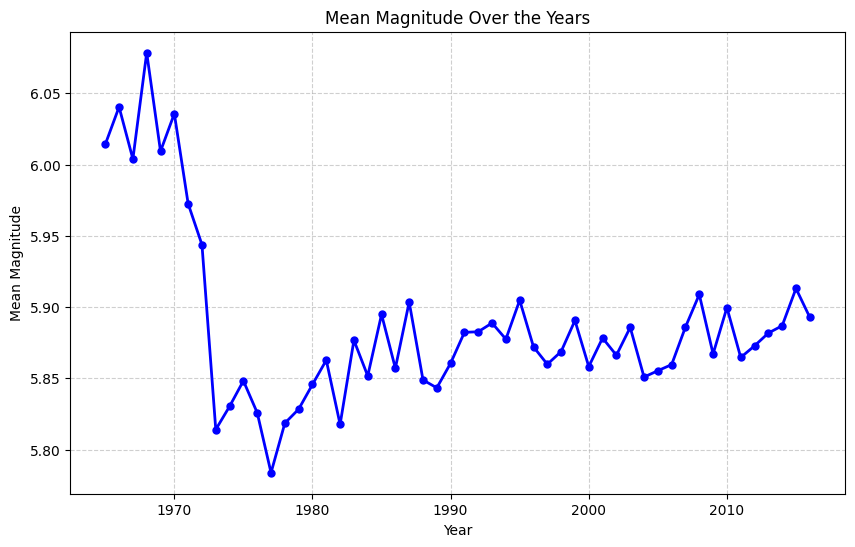

In [52]:
plt.figure(figsize=(10, 6))
df.groupby('Year')['Magnitude'].mean().plot(kind='line', color='b', linestyle='-', linewidth=2, marker='o', markersize=5, title='Mean Magnitude Over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Magnitude')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

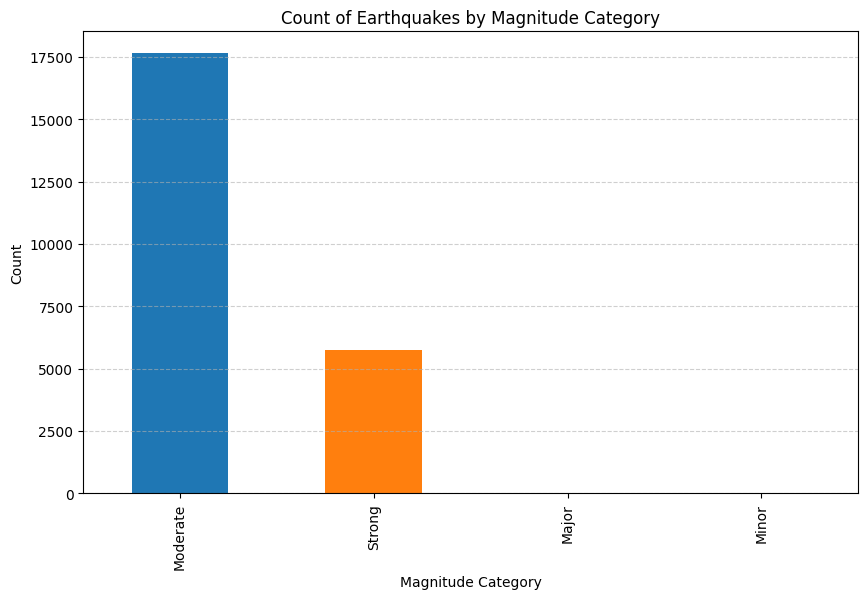

In [53]:
# Bar Chart: Count of Earthquakes by Magnitude Category
plt.figure(figsize=(10, 6))
df['Magnitude Category'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], title='Count of Earthquakes by Magnitude Category')
plt.xlabel('Magnitude Category')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<Figure size 1000x600 with 0 Axes>

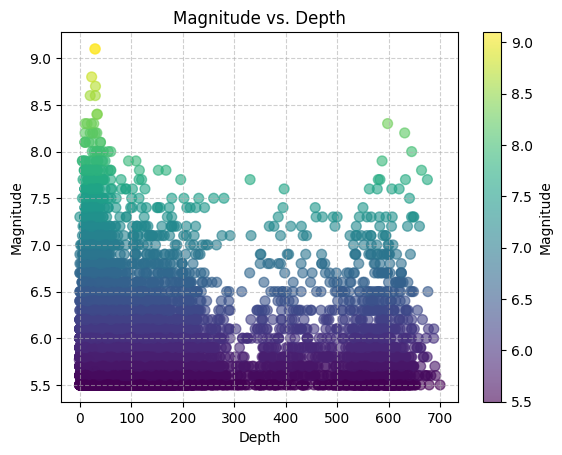

In [54]:
# Scatter Chart: Magnitude vs. Depth
plt.figure(figsize=(10, 6))
df.plot(kind='scatter', x='Depth', y='Magnitude', c='Magnitude', cmap='viridis', colorbar=True, title='Magnitude vs. Depth', alpha=0.6, s=50)
plt.xlabel('Depth')
plt.ylabel('Magnitude')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

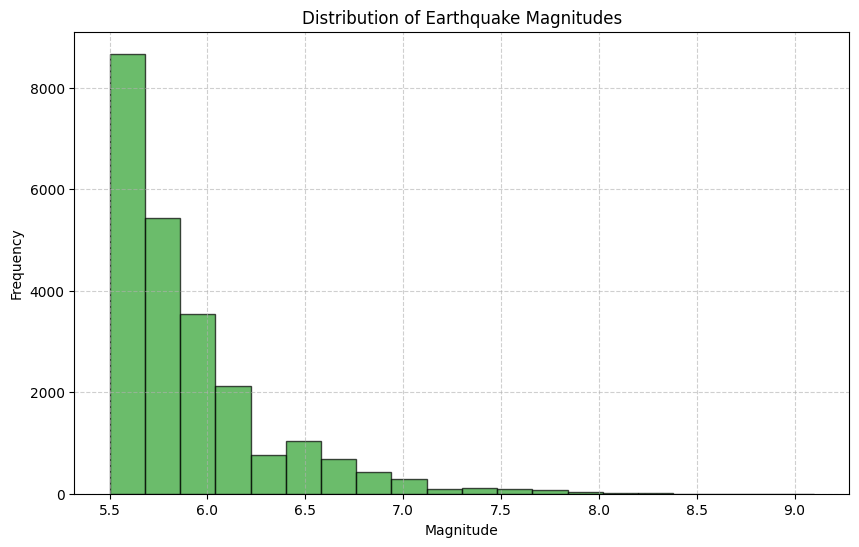

In [55]:
# Histogram: Distribution of Earthquake Magnitudes
plt.figure(figsize=(10, 6))
df['Magnitude'].plot(kind='hist', bins=20, color='#2ca02c', edgecolor='black', alpha=0.7, title='Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

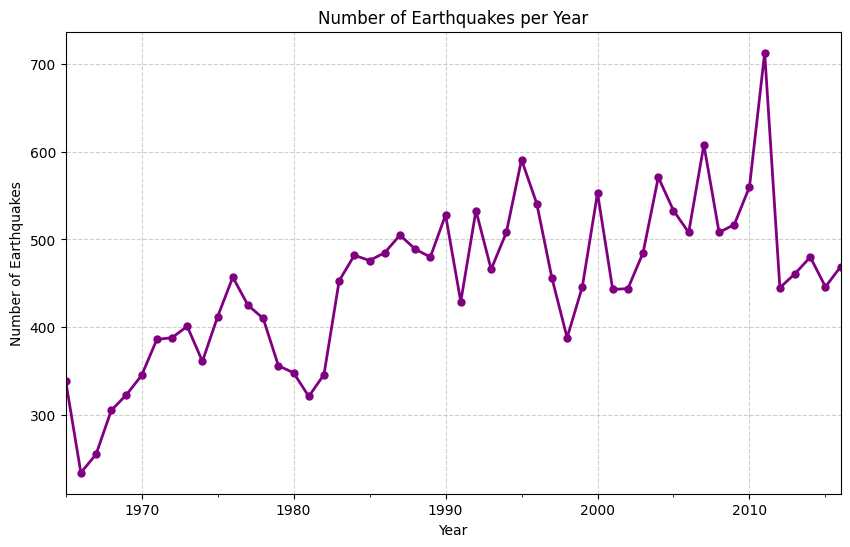

In [56]:
# Resample: Resample to find the number of earthquakes per year
yearly_earthquakes = df.resample('YE', on='Date').size()
plt.figure(figsize=(10, 6))
yearly_earthquakes.plot(kind='line', color='purple', linestyle='-', linewidth=2, marker='o', markersize=5, title='Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

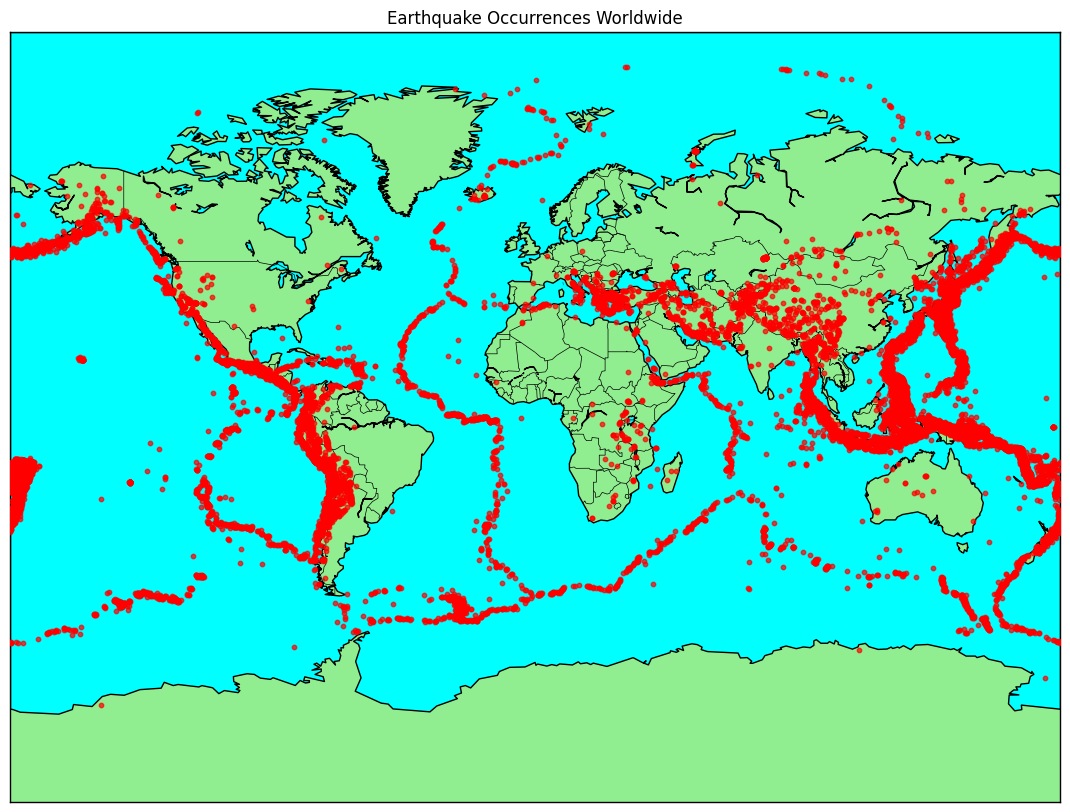

In [57]:
# This chart shows number of earthquakes worldwide
plt.figure(figsize=(15,10))
m = Basemap(projection='mill', llcrnrlat=-90, urcrnrlat=90, llcrnrlon=-180, urcrnrlon=180, resolution='c')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='lightgreen', lake_color='aqua')

# Extract latitude and longitude data
latitudes = df['Latitude'].values
longitudes = df['Longitude'].values

# Plot earthquakes
x, y = m(longitudes, latitudes)
m.scatter(x, y, marker='o', color='red', s=10, alpha=0.7, zorder=5)

plt.title('Earthquake Occurrences Worldwide')
plt.show()


# Data Transformation

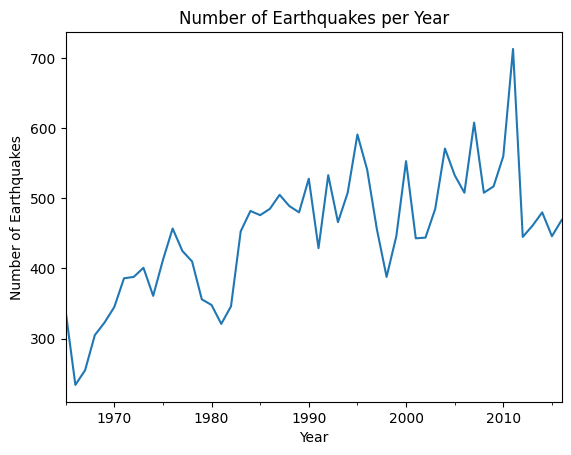

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,ID,Source,Location Source,Magnitude Source,Status,Year,Month,Day,Magnitude Category,Day of Week
0,1965-01-02 00:00:00+00:00,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,2,Moderate,Saturday
1,1965-01-04 00:00:00+00:00,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,4,Moderate,Monday
2,1965-01-05 00:00:00+00:00,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,5,Strong,Tuesday
3,1965-01-08 00:00:00+00:00,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,8,Moderate,Friday
4,1965-01-09 00:00:00+00:00,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965,1,9,Moderate,Saturday


In [58]:
yearly_earthquakes = df.resample('YE', on='Date').size()
yearly_earthquakes.plot(kind='line', title='Number of Earthquakes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.show()

df['Day of Week'] = df['Date'].dt.day_name()

df.head()
